In [54]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [55]:
import pandas as pd
import  matplotlib.pyplot as plt

In [56]:
# Get iris data
data = load_iris()
X = data.data # feature data (sepal length, sepal width, petal length, petal width)
y = data.target # target data that represents species (0, 1, 2)

In [57]:
names = list(data.feature_names) # get feature names
species = list(data.target_names) # get target names
iris = pd.DataFrame(X, columns = names) # create data frame with feature data
iris['species'] = y # add target data to the data frame
iris['species'] = iris['species'].replace({0:species[0],1:species[1],2:species[2]})
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


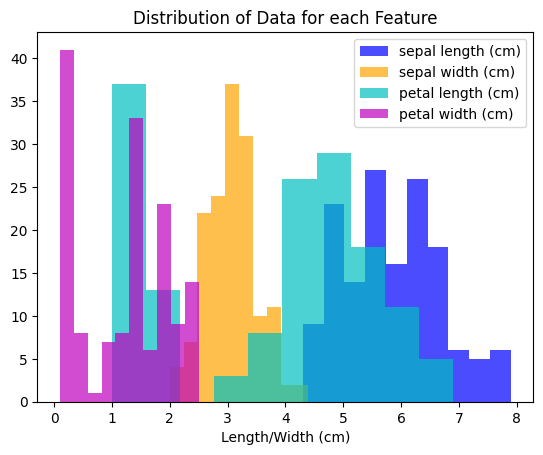

In [58]:
# create histograms for each feature
plt.hist(iris['sepal length (cm)'], color = 'blue', label = names[0], alpha = 0.7)
plt.hist(iris['sepal width (cm)'], color = 'orange', label = names[1], alpha = 0.7)
plt.hist(iris['petal length (cm)'], color = 'c', label = names[2], alpha = 0.7)
plt.hist(iris['petal width (cm)'], color = 'm', label = names[3], alpha = 0.7)
plt.title('Distribution of Data for each Feature')
plt.xlabel('Length/Width (cm)')
plt.legend()

In [59]:
# create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
# Run Guassian Naive Bayes
gnb = GaussianNB() # create the model
model = gnb.fit(X_train, y_train) # fit the model
y_pred = model.predict(X_test) # predict species based off model with test data
# find how many predicted values did not equal the true test values
print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (y_test != y_pred).sum())) 
#To measure Accuracy
print(f'Model accuracy score: {100*accuracy_score(y_test, y_pred):0.2f}%')

Number of mislabeled points out of a total 75 points : 4
Model accuracy score: 94.67%
